In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,92016995-e455-4651-9f6e-fbca0d423f21,0,0.001311,1.414360e-07,0.013233,37.1427,0.178181,0.008260,62.6563,neutral
1,92016995-e455-4651-9f6e-fbca0d423f21,1,0.001332,1.421510e-07,0.013304,36.9452,0.179674,0.008271,62.8523,neutral
2,92016995-e455-4651-9f6e-fbca0d423f21,2,0.001311,1.414390e-07,0.013234,37.1393,0.178144,0.008264,62.6598,neutral
3,92016995-e455-4651-9f6e-fbca0d423f21,3,0.001810,1.431440e-07,0.023875,11.0442,0.208299,0.002817,88.7190,neutral
4,92016995-e455-4651-9f6e-fbca0d423f21,4,0.001834,1.460720e-07,0.024232,11.0388,0.209914,0.002865,88.7224,neutral


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          14 non-null     object 
 1   image_seq         14 non-null     int64  
 2   angry             14 non-null     float64
 3   disgust           14 non-null     float64
 4   fear              14 non-null     float64
 5   happy             14 non-null     float64
 6   sad               14 non-null     float64
 7   surprise          14 non-null     float64
 8   neutral           14 non-null     float64
 9   dominant_emotion  14 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.2+ KB


In [4]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear      happy        sad  \
count    14.0000  14.000000  1.400000e+01  14.000000  14.000000  14.000000   
mean      6.5000   0.004150  2.845287e-07   0.035453  22.363658   0.436512   
std       4.1833   0.005592  3.189387e-07   0.038552  13.685238   0.515204   
min       0.0000   0.000589  8.565390e-08   0.009689   4.029290   0.142390   
25%       3.2500   0.001167  9.763400e-08   0.011825  11.040150   0.164553   
50%       6.5000   0.001322  1.417950e-07   0.016607  30.083650   0.178928   
75%       9.7500   0.001975  1.759498e-07   0.026713  33.227100   0.217362   
max      13.0000   0.014587  8.826870e-07   0.106949  37.142700   1.394150   

        surprise    neutral  
count  14.000000  14.000000  
mean    0.004707  77.155543  
std     0.002990  13.272423  
min     0.000761  62.656300  
25%     0.002637  66.603050  
50%     0.004929  69.743700  
75%     0.007142  88.721550  
max     0.008271  94.465500  


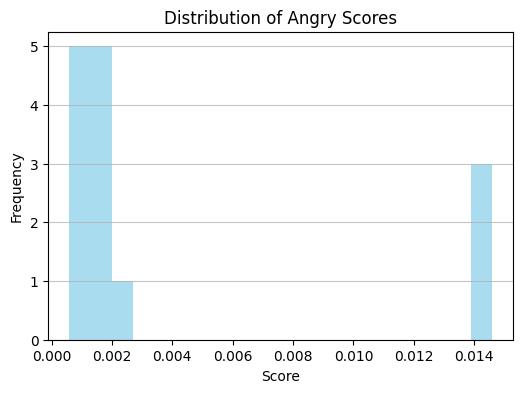

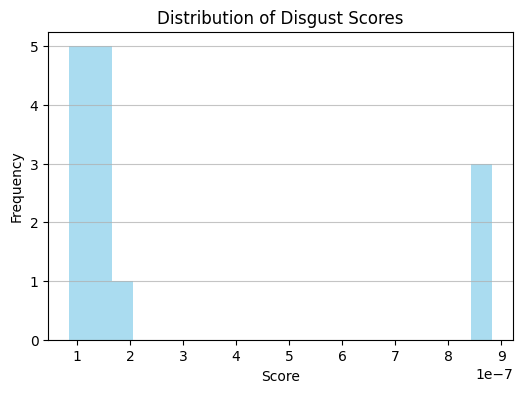

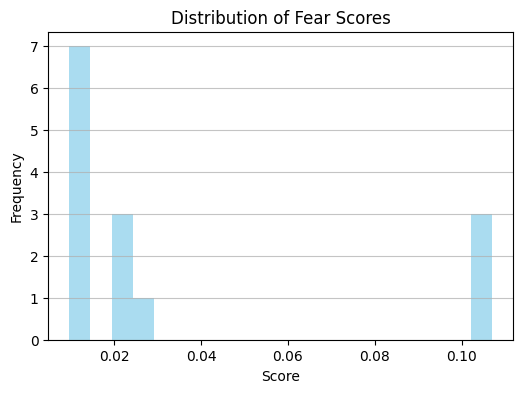

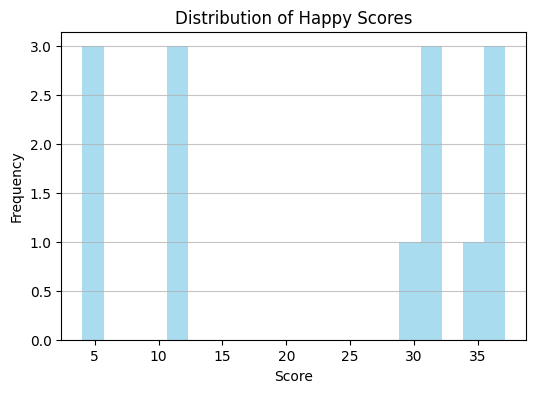

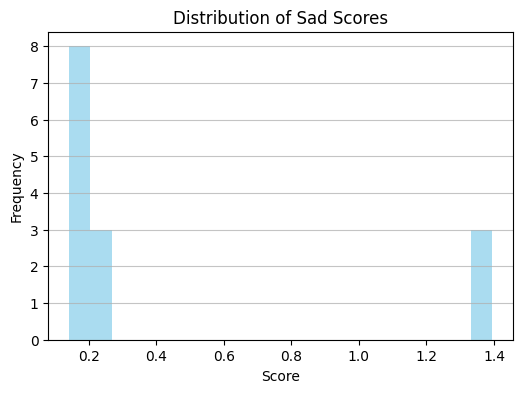

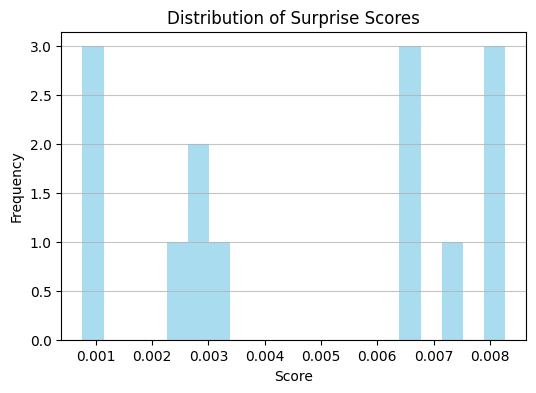

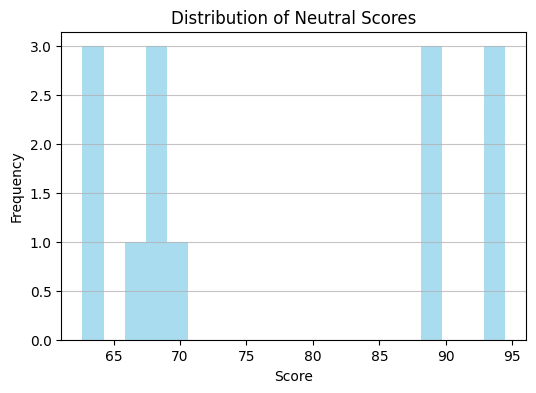

In [5]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

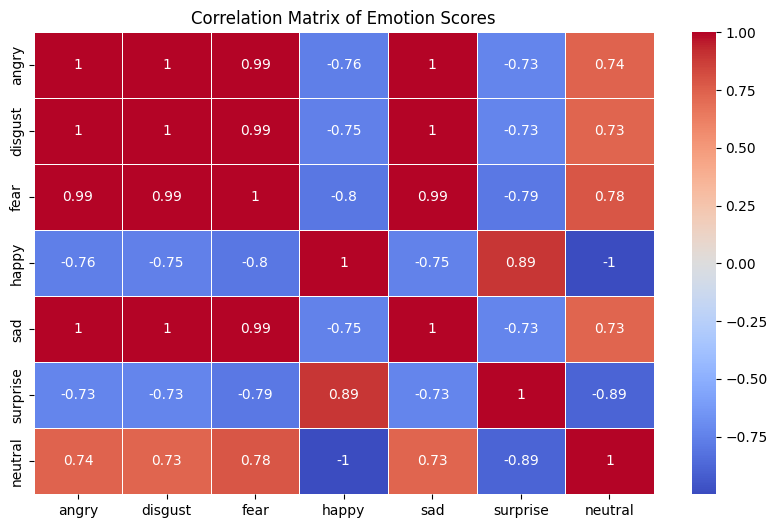

In [17]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

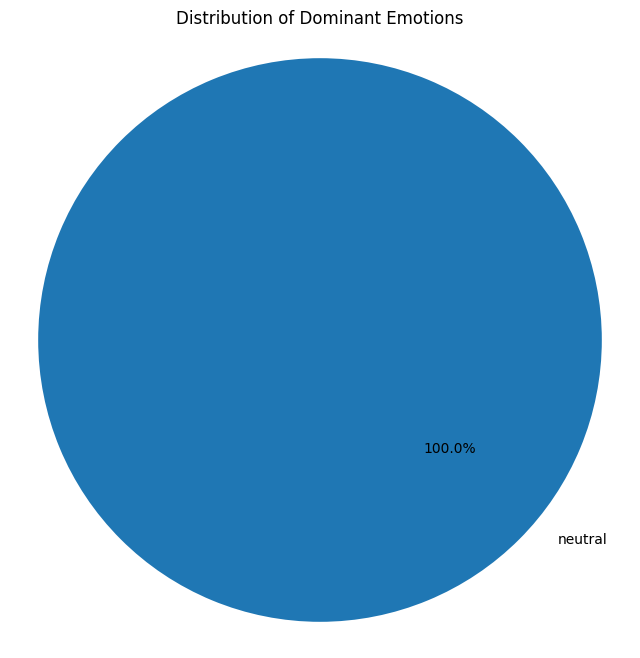

In [6]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [7]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,92016995-e455-4651-9f6e-fbca0d423f21,1,1,0,-1.8621
1,92016995-e455-4651-9f6e-fbca0d423f21,2,1,0,-1.5986
2,92016995-e455-4651-9f6e-fbca0d423f21,3,1,0,-1.9993
3,92016995-e455-4651-9f6e-fbca0d423f21,4,1,0,-2.1208
4,92016995-e455-4651-9f6e-fbca0d423f21,5,1,0,-2.1463


In [8]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

       gaze  blink  eye_offset
count  14.0   14.0   14.000000
mean    1.0    0.0   -1.707193
std     0.0    0.0    0.322101
min     1.0    0.0   -2.146300
25%     1.0    0.0   -1.971350
50%     1.0    0.0   -1.672150
75%     1.0    0.0   -1.538900
max     1.0    0.0   -1.163300


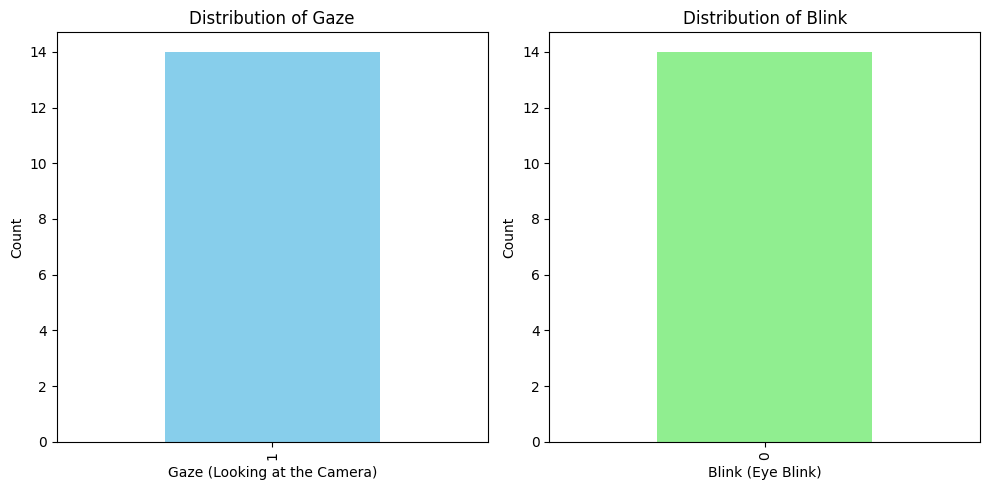

In [9]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

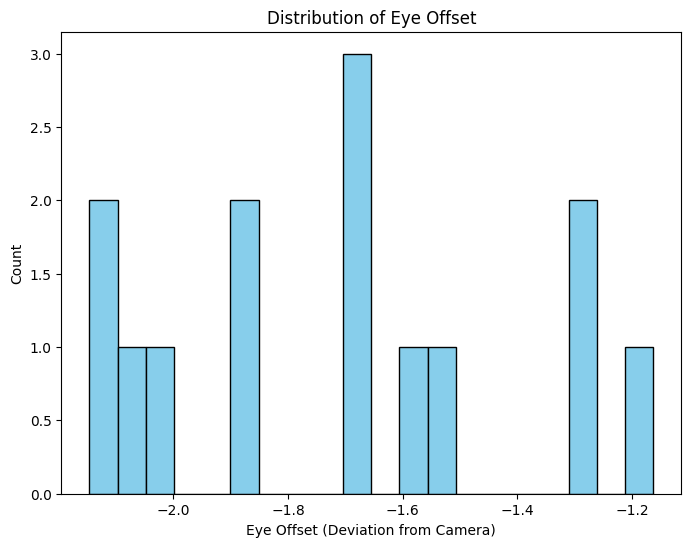

In [10]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [11]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,92016995-e455-4651-9f6e-fbca0d423f21,0,b4b6b5a2-4203-41c2-b703-c424dae1fe2b,6.0,2023-09-17 07:47:05,0.0
1,92016995-e455-4651-9f6e-fbca0d423f21,1,b4b6b5a2-4203-41c2-b703-c424dae1fe2b,7.0,2023-09-17 07:47:05,0.0
2,92016995-e455-4651-9f6e-fbca0d423f21,2,b4b6b5a2-4203-41c2-b703-c424dae1fe2b,8.0,2023-09-17 07:47:05,0.0
3,92016995-e455-4651-9f6e-fbca0d423f21,3,b4b6b5a2-4203-41c2-b703-c424dae1fe2b,9.0,2023-09-17 07:47:05,0.0
4,92016995-e455-4651-9f6e-fbca0d423f21,4,b4b6b5a2-4203-41c2-b703-c424dae1fe2b,10.0,2023-09-17 07:47:05,0.0


In [12]:
metadata_df.shape

(14, 6)

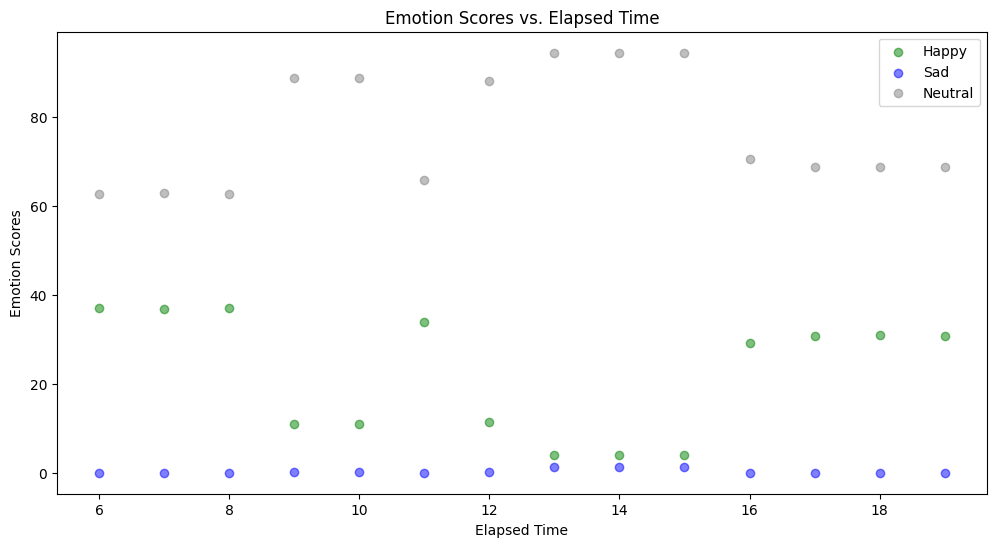

In [14]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [27]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

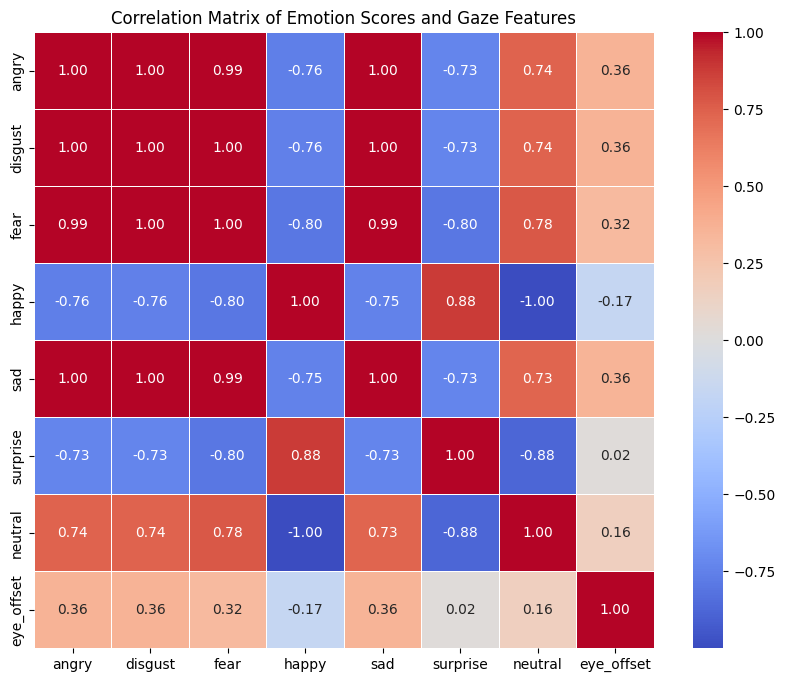

In [28]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [15]:
transcript_scores_df = pd.read_csv("6.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,5.28,"Hi, my name is Nathan Lewis. I'm a first year...","[50364, 2421, 11, 452, 1315, 307, 1160, 2173, ...",0.0,-0.279322,1.615385,0.599536,0.442265,0.168479,0.389255,0.814687,0.888548,0.687718,0.475202,2.840909
1,1,0,5.28,9.40,Kashipur. From having a consulting experience...,"[50628, 591, 15612, 35801, 13, 3358, 1419, 257...",0.0,-0.279322,1.615385,0.599536,0.625293,0.189070,0.185637,0.882211,0.733979,0.715336,0.498379,2.669903
2,2,0,9.40,14.56,"after graduating in engineering, I paved my w...","[50834, 934, 18843, 294, 7043, 11, 286, 42989,...",0.0,-0.279322,1.615385,0.599536,0.663539,0.139990,0.196471,0.718757,0.475904,0.468598,0.249355,2.713178
3,3,0,14.56,19.24,quench my thirst for exploration into an amal...,"[51092, 421, 40765, 452, 34846, 337, 16197, 66...",0.0,-0.279322,1.615385,0.599536,0.629362,0.254180,0.116459,0.246212,0.139614,0.017593,0.297431,2.777778
4,4,0,19.24,23.20,strategy and planning. During my time in Delo...,"[51326, 5206, 293, 5038, 13, 6842, 452, 565, 2...",0.0,-0.279322,1.615385,0.599536,0.616287,0.167756,0.215957,0.557684,0.344132,0.273927,0.111189,3.030303


In [16]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean    0.711182   0.138992   0.149826   0.679755   0.490252   0.367792   
std     0.198963   0.116937   0.105570   0.207984   0.229847   0.211848   
min     0.307604   0.005599   0.011148   0.246212   0.003024   0.017593   
25%     0.613703   0.040437   0.067492   0.568087   0.372056   0.282918   
50%     0.689340   0.140605   0.123151   0.738239   0.491895   0.356393   
75%     0.892071   0.183205   0.214039   0.836144   0.664430   0.459095   
max     0.983253   0.484113   0.389255   0.914015   0.888548   0.765156   

       enthusiastic  speech_speed  
count     18.000000     18.000000  
mean       0.481433      2.583163  
std        0.314647      0.581728  
min        0.111189      0.806452  
25%        0.250644      2.465960  
50%        0.376623      2.674237  
75%        0.806500      2.982955  
max        0.977169      3.320313  


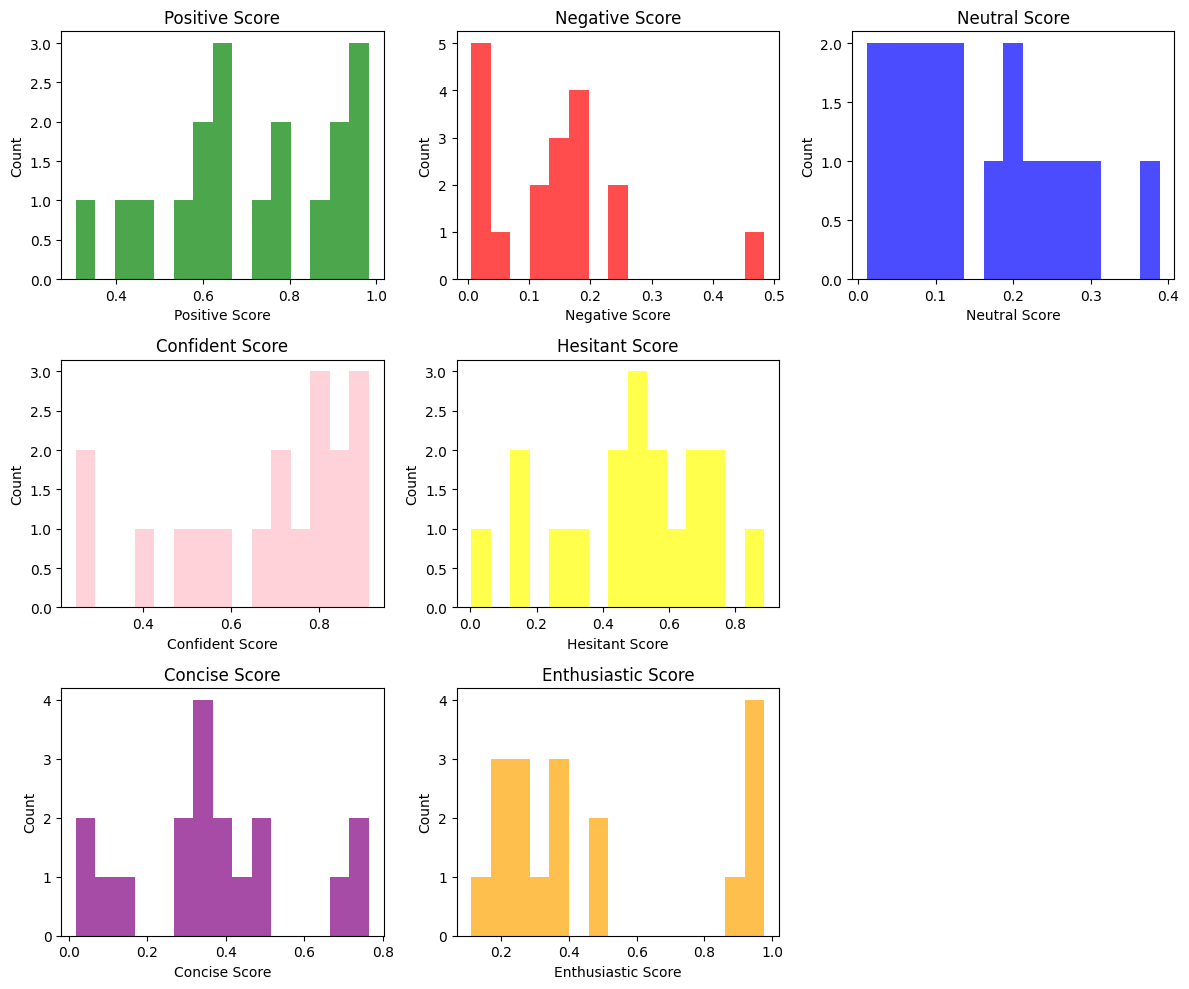

In [17]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

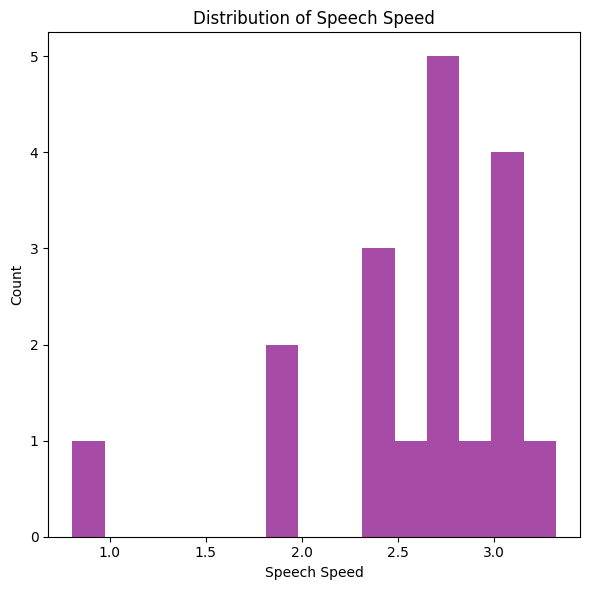

In [18]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

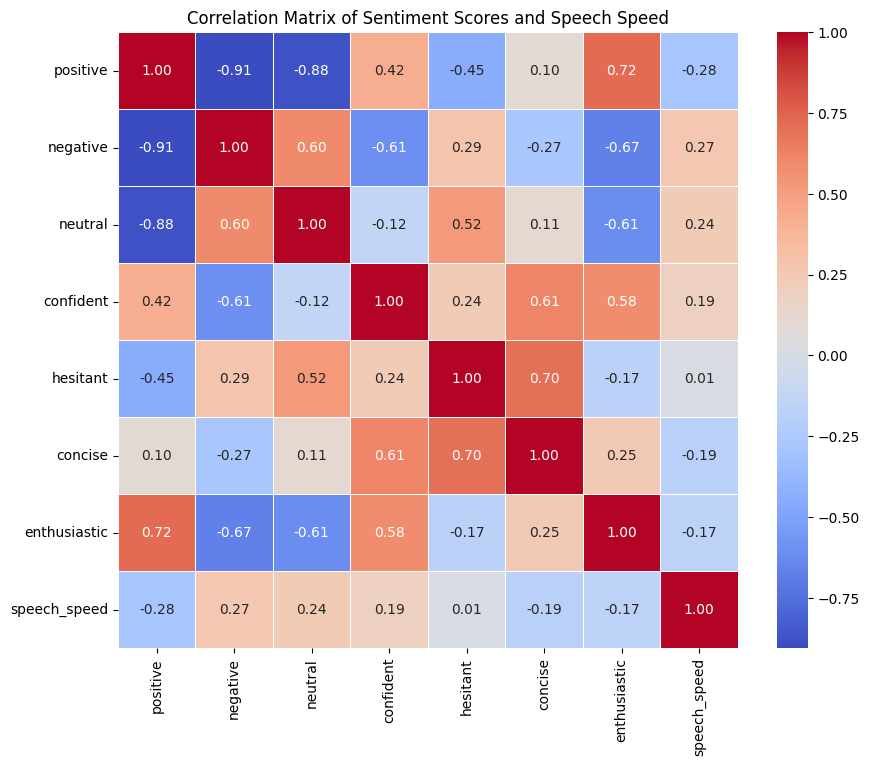

In [19]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

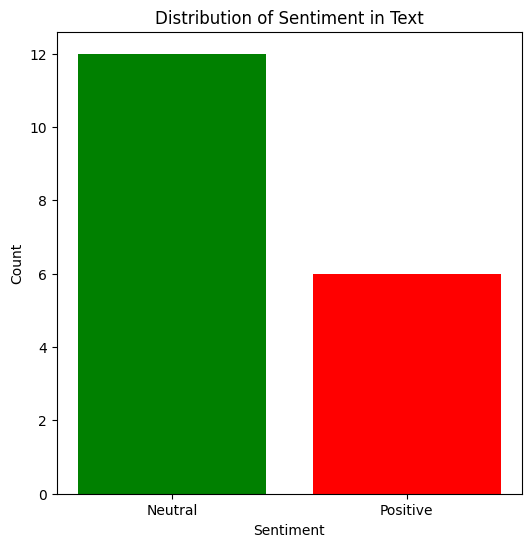

In [34]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [20]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                 text dominant_quality
0    Hi, my name is Nathan Lewis. I'm a first year...         hesitant
1    Kashipur. From having a consulting experience...        confident
2    after graduating in engineering, I paved my w...        confident
3    quench my thirst for exploration into an amal...         positive
4    strategy and planning. During my time in Delo...         positive
5    validation processes for softwares for pharma...         positive
6    post-graduation in MBA analytics has taken me...         positive
7    in business. To fuel my constant need to take...         hesitant
8    the media and public relations committee of o...        confident
9    the team who plans to create and apply for a ...         positive
10   the college. I also handle the social media p...        confident
11   content writer and editor for college related...        confident
12   love interacting with people and understandin...     enthusiastic
13   b

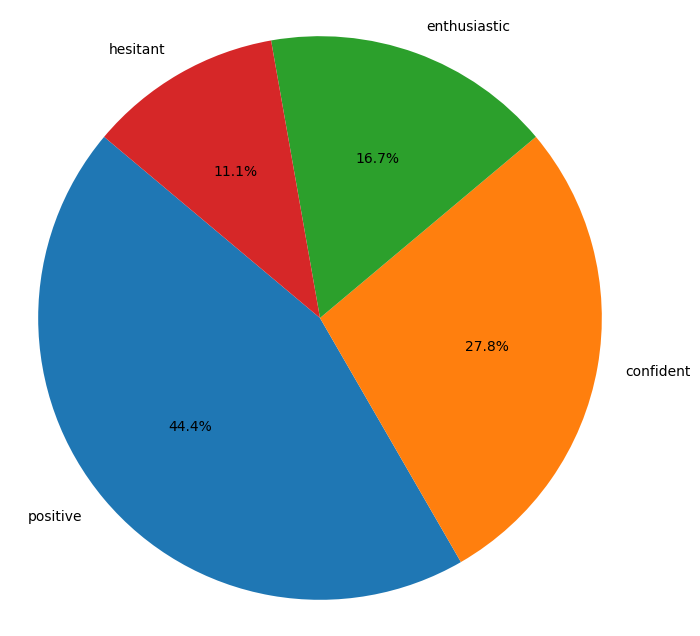

In [21]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [22]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'neutral': 1.0}

In [23]:
emotion_percentage_dict['disgust']=0
emotion_percentage_dict['happy']=0
emotion_percentage_dict['angry']=0
emotion_percentage_dict['sad']=0
emotion_percentage_dict['surprise']=0
emotion_percentage_dict['fear']=0

In [24]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [25]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: 77.15554285714286


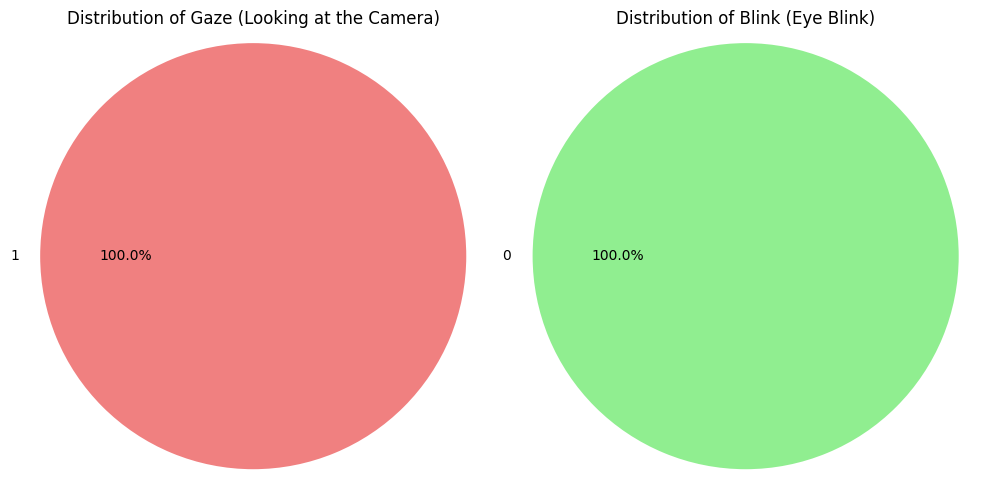

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [27]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [28]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [29]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.981225873015873

In [32]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'positive': 0.4444444444444444,
 'confident': 0.2777777777777778,
 'enthusiastic': 0.16666666666666666,
 'hesitant': 0.1111111111111111}

In [33]:
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict['negative']=0
sentiment_percentage_dict

{'positive': 0.4444444444444444,
 'confident': 0.2777777777777778,
 'enthusiastic': 0.16666666666666666,
 'hesitant': 0.1111111111111111,
 'concise': 0,
 'neutral': 0,
 'negative': 0}

In [34]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [35]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.5306681952738193

In [36]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [37]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.9168365366693456


In [38]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

86.0651816202119